In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [29]:
df = pd.read_csv("/content/house.csv")
df.head()

,Unnamed: 0,Climate,Housing,Health,Crime,Transportation,Education,Arts,Recreation,Economy
0,House1,0.190,0.544,0.782,0.365,0.585,0.394,0.985,0.520,0.142
1,House2,0.017,0.020,-0.605,0.294,0.085,-0.273,0.126,0.402,0.150
2,House3,0.207,0.204,0.144,0.585,0.234,0.027,-0.111,0.519,0.239


In [30]:
df.set_index(df.columns[0], inplace=True)

In [31]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [33]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

In [37]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'], index=df.index)

In [38]:
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)


Explained Variance Ratio:
 [6.63393300e-01 3.36606700e-01 2.30469617e-32]


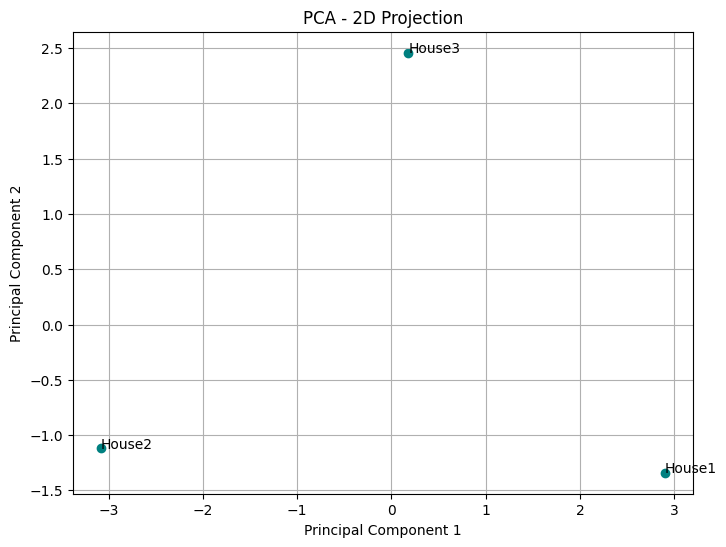

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='teal')
for i in pca_df.index:
    plt.annotate(i, (pca_df['PC1'][i], pca_df['PC2'][i]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.grid(True)
plt.show()

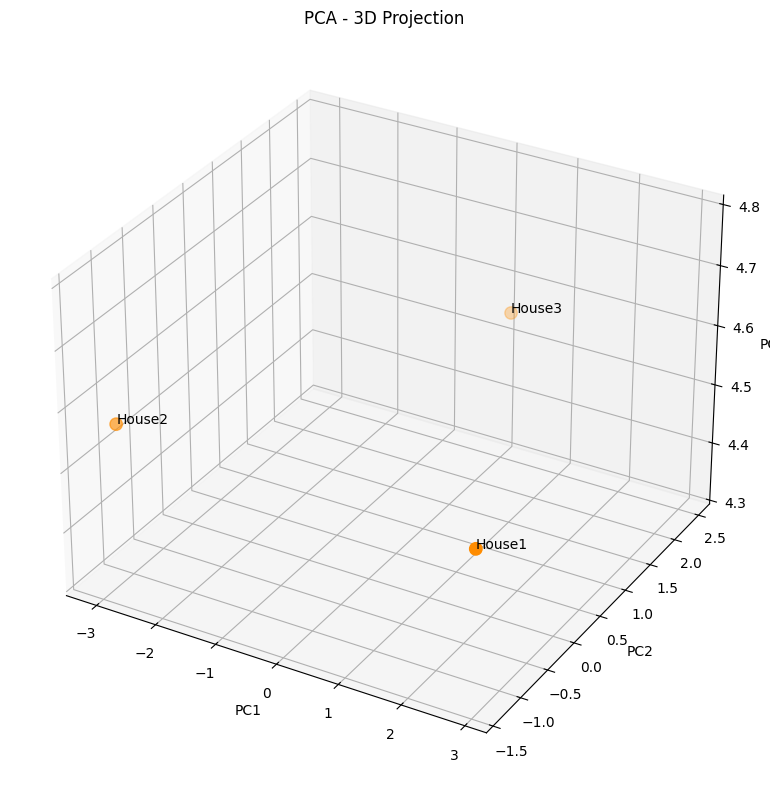

In [40]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='darkorange', s=80)
for i in pca_df.index:
    ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], i)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("PCA - 3D Projection")
plt.tight_layout()
plt.show()